In [26]:
import pandas as pd
import os
path='../../data/intermediate/inter_medpix.csv'
df=pd.read_csv(path)
c=df.groupby(['Anatomy','Core_Modality']).Full_Caption.count().unstack()
# c.index.name='Anatomy'
c.loc[:,'Total']=c.sum(axis=1) # Adding the 'Total' column
c=c.sort_values('Total',axis=0,ascending=False)
c.drop(columns=['Total'],inplace=True)
c.loc['Total',:]=c.sum(axis=0) # Adding the 'Total' row
c=c.sort_values('Total',axis=1, ascending=False)
c.loc[:,'Total']=c.sum(axis=1) # Adding the 'Total' column
c.index.name=None # set index name to None
c.columns.name='Anatomy' # set columns name to Anatomy


medical_terms = {
    'MR': 'Magnetic Resonance',
    'CT': 'Computed Tomography',
    'XR': 'Plain X-Ray',
    'HE': 'Histology',
    'GR': 'Gross Photograph',
    'INT': 'Interventional',
    'UGI': 'Upper Gastrointestinal',
    'BAS': 'Barium Swallow',
    'PET/NM': 'Nuclear Medicine (including PET scans)',
    'AN': 'Angiography',
    'US': 'Ultrasound',


    
}

caption='Sample distribution in the MedPix dataset. Columns represent the '+\
        'imaging modalities. These are abbreviated with keys: '
for i,(k,m) in enumerate(medical_terms.items()):
    if (i+1)<len(medical_terms):
        caption += (' '+ k+': '+m+',')
    else:
        caption += (' '+ k+': '+m+'.')
        
    
print(caption)
        
display(c)
latex_table=c.to_latex(index=True,
                 caption=caption,
                 label='tab: sample distribution',
                 bold_rows=True,
                 column_format='lrrrrrrrrrrrr',
                 float_format="%.0f",
                 na_rep='-')
os.makedirs('../../manuscript/tables/', exist_ok=True)
with open('../../manuscript/tables/'+"Mexpix_characterization.tex", "w") as file1:
    # Writing data to a file
    file1.write(latex_table)

Sample distribution in the MedPix dataset. Columns represent the imaging modalities. These are abbreviated with keys:  HE: Histology, GR: Gross Photograph, INT: Interventional, UGI: Upper Gastrointestinal, BAS: Barium Swallow, PET/NM: Nuclear Medicine (including PET scans), AN: Angiography, US: Ultrasound, XR: Plain X-Ray, CT: Computed Tomography, MR: Magnetic Resonance.


Anatomy,MR,CT,XR,US,AN,PET/NM,BAS,UGI,INT,GR,HE,Total
Brain,7458.0,1542.0,81.0,105.0,637.0,44.0,NaN,NaN,11.0,28.0,37.0,9943.0
Musculoskeletal,1412.0,598.0,1935.0,57.0,27.0,145.0,NaN,NaN,14.0,80.0,10.0,4278.0
Abdomen,172.0,1850.0,327.0,350.0,33.0,80.0,147.0,149.0,48.0,9.0,21.0,3186.0
Pulmonary,161.0,1200.0,1009.0,12.0,69.0,32.0,6.0,4.0,7.0,1.0,9.0,2510.0
Genitourinary,235.0,908.0,74.0,762.0,74.0,33.0,NaN,NaN,21.0,3.0,4.0,2114.0
Head and Neck,671.0,962.0,60.0,66.0,80.0,27.0,9.0,NaN,5.0,17.0,22.0,1919.0
Spine,1086.0,457.0,291.0,9.0,22.0,17.0,NaN,NaN,NaN,NaN,NaN,1882.0
Cardiovascular,174.0,903.0,255.0,71.0,290.0,21.0,7.0,4.0,45.0,4.0,NaN,1774.0
Generalized,471.0,315.0,167.0,48.0,30.0,11.0,8.0,NaN,2.0,3.0,4.0,1059.0
Total,11840.0,8735.0,4199.0,1480.0,1262.0,410.0,177.0,157.0,153.0,145.0,107.0,28665.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

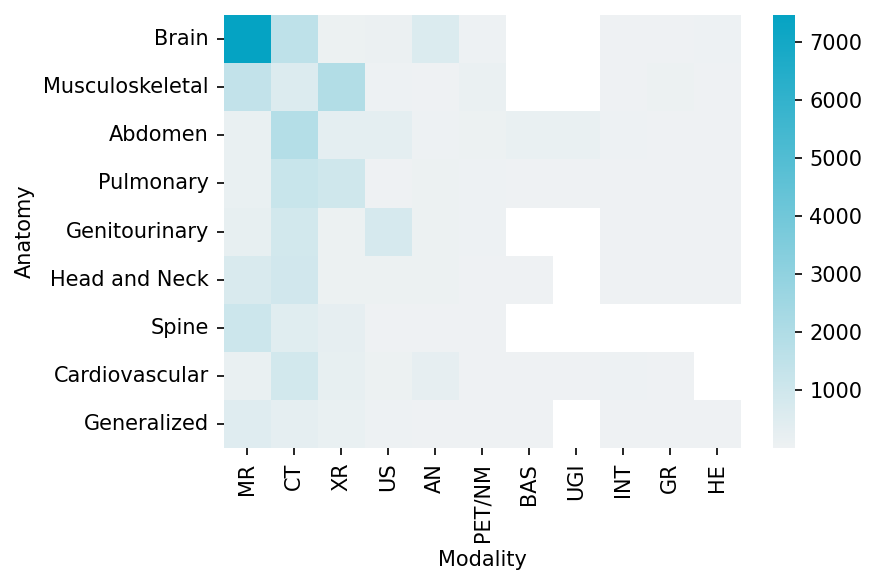

In [3]:
c=df.groupby(['Anatomy','Core_Modality']).Full_Caption.count().unstack()
# c.index.name='Anatomy'
c.loc[:,'Total']=c.sum(axis=1) # Adding the 'Total' column
c.loc['Total',:]=c.sum(axis=0) # Adding the 'Total' row
c.columns.name='Modality'
c.index.name='Anatomy'
c=c.sort_values('Total',axis=1,ascending=False).sort_values('Total',axis=0,ascending=False)
fig,ax= plt.subplots(dpi=150)
sns.heatmap(c.iloc[1:,1:],cmap=sns.light_palette("#05A3C3", reverse=False, as_cmap=True), ax =ax)
plt.tight_layout()
os.makedirs('../../manuscript/images/',exist_ok=True)
fig.savefig('../../manuscript/images/medpix_anatomy_vs_modality_heatmap.jpg')


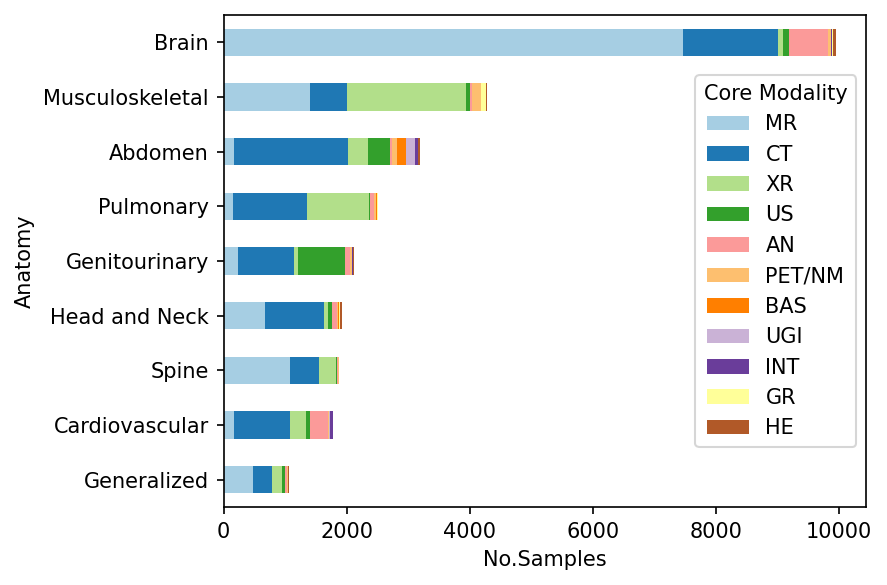

In [13]:
fig,ax=plt.subplots(dpi=150)
c=df.groupby(['Anatomy','Core_Modality']).Full_Caption.count().unstack()
c.loc[:,'Total']=c.sum(axis=1) # Adding the 'Total' column
c.loc['Total',:]=c.sum(axis=0) # Adding the 'Total' row
c=c.sort_values('Total',axis=1,ascending=False).sort_values('Total',axis=0)
c.iloc[:-1,1:].plot(kind='barh',stacked=True,ax=ax, colormap=sns.color_palette("Paired",as_cmap=True))
plt.ylabel('Anatomy')
plt.xlabel('No.Samples')
plt.legend(loc='right', title='Core Modality')
plt.tight_layout()
fig.savefig('../../manuscript/images/medpix_anatomy_vs_modality_bars.jpg')

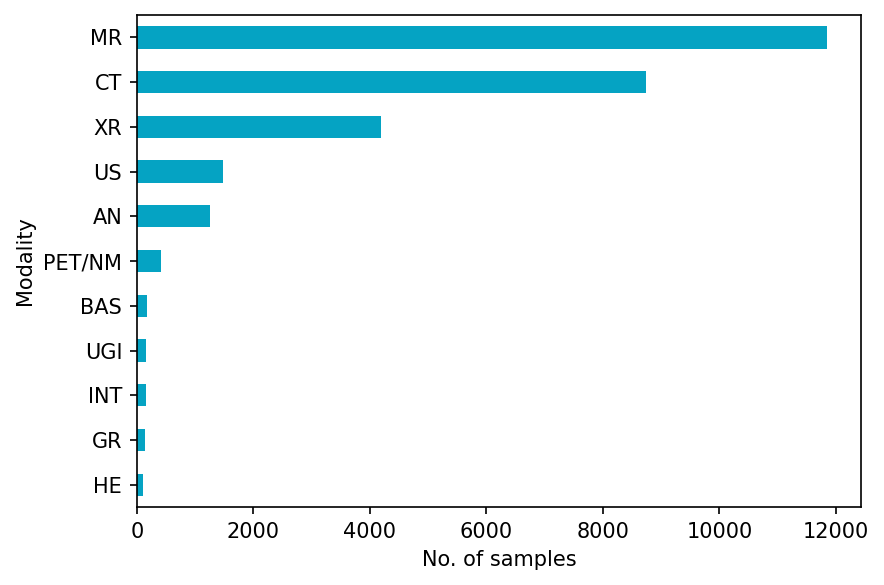

In [5]:
fig,ax=plt.subplots(dpi=150)
df.Core_Modality.value_counts().sort_values().plot.barh(color='#05A3C3', ax=ax)
ax.set_ylabel('Modality')
ax.set_xlabel('No. of samples')
plt.tight_layout()
fig.savefig('../../manuscript/images/medpix_modality_bars.jpg')

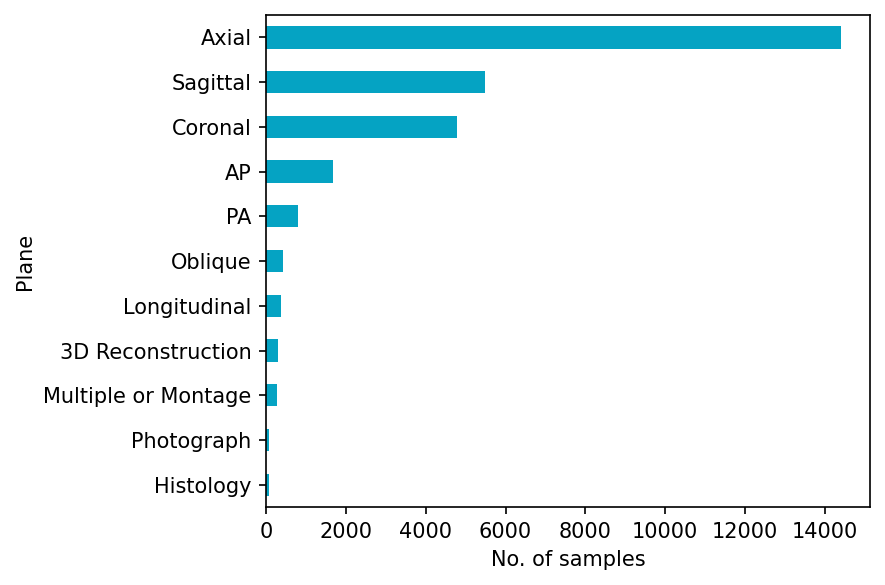

In [6]:
fig,ax=plt.subplots(dpi=150)
df.Plane.value_counts().sort_values().plot.barh(color='#05A3C3', ax=ax)
ax.set_ylabel('Plane')
ax.set_xlabel('No. of samples')
plt.tight_layout()
fig.savefig('../../manuscript/images/medpix_plane_bars.jpg')

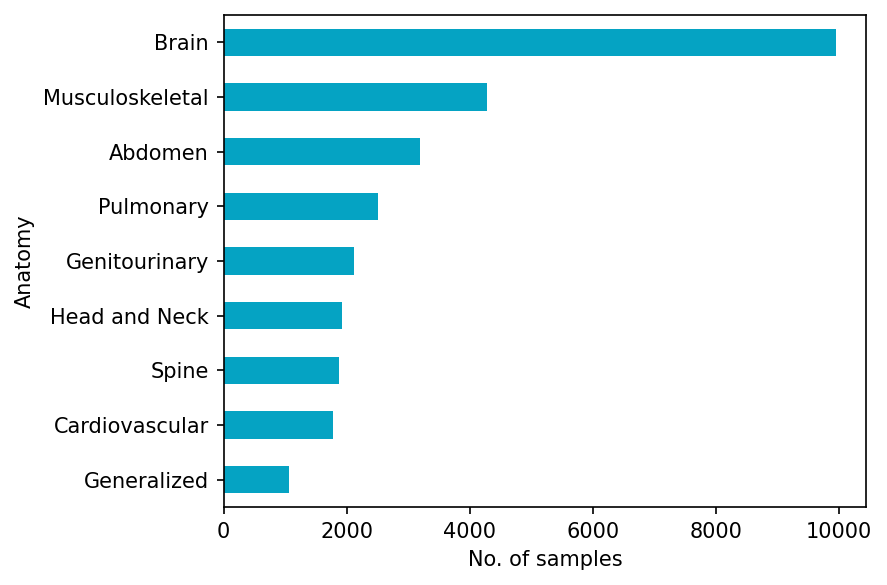

In [7]:
fig,ax=plt.subplots(dpi=150)
df.Anatomy.value_counts().sort_values().plot.barh(color='#05A3C3', ax=ax)
ax.set_ylabel('Anatomy')
ax.set_xlabel('No. of samples')
plt.tight_layout()
fig.savefig('../../manuscript/images/medpix_anatomy_bars.jpg')

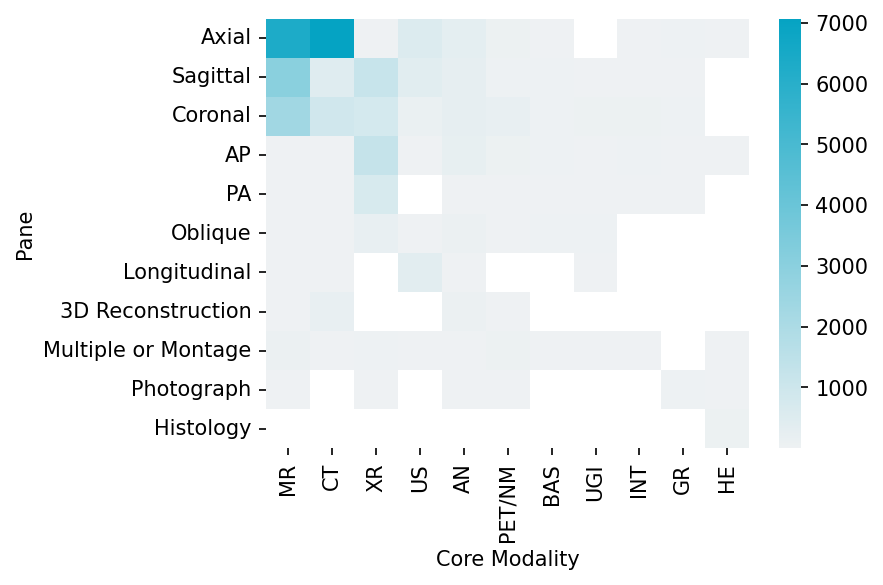

In [8]:
p=df.groupby(['Plane','Core_Modality']).Full_Caption.count().unstack()
p.loc[:,'Total']=p.sum(axis=1) # Adding the 'Total' column
p.loc['Total',:]=p.sum(axis=0) # Adding the 'Total' row

p=p.sort_values('Total',axis=1,ascending=False).sort_values('Total',axis=0,ascending=False)
p.columns.name='Core Modality'
p.index.name='Pane'
fig,ax= plt.subplots(dpi=150)
sns.heatmap(p.iloc[1:,1:],cmap=sns.light_palette("#05A3C3", reverse=False, as_cmap=True), ax =ax)
plt.tight_layout()
os.makedirs('../../manuscript/images/',exist_ok=True)
fig.savefig('../../manuscript/images/medpix_plane_vs_modality_heatmap.jpg')



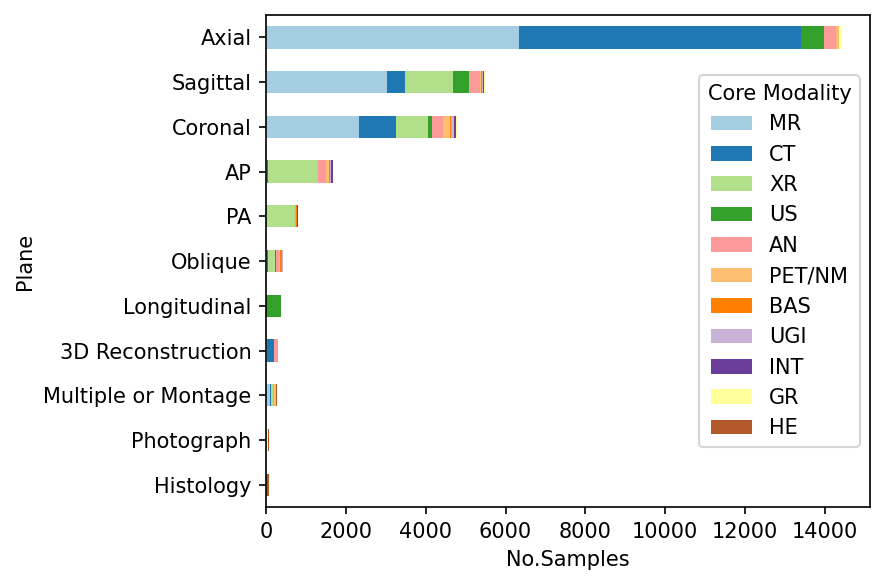

In [9]:
fig,ax= plt.subplots(dpi=150)
p=p.sort_values('Total',axis=1,ascending=False).sort_values('Total',axis=0,ascending=True)
p.iloc[:-1,1:].plot(kind='barh',stacked=True,ax=ax, colormap=sns.color_palette("Paired",as_cmap=True))
plt.ylabel('Plane')
plt.xlabel('No.Samples')
plt.legend(loc='right',title='Core Modality')
plt.tight_layout()
plt.tight_layout()
os.makedirs('../../manuscript/images/',exist_ok=True)
fig.savefig('../../manuscript/images/medpix_plane_vs_modality_bars.jpg')

In [10]:
df['Words']=df.Full_Caption.str.split().apply(len)

/home/jupyter/MedClip/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  """


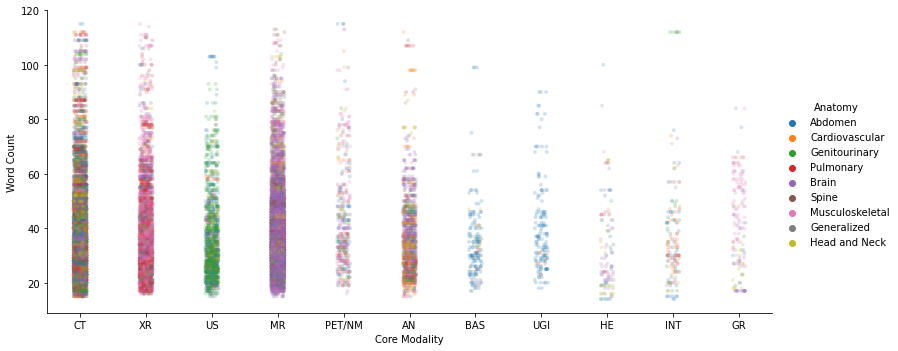

In [11]:
# fig,ax = plt.subplots(figsize=(1,2))
a=sns.catplot(data=df, x="Core_Modality", y="Words", hue='Anatomy',
            color="#05A3C3",aspect=2.2, alpha=0.2,
              palette=sns.color_palette("tab10"),
           linewidth=0,s=15,legend_out=False)
plt.ylabel('Word Count')
plt.xlabel('Core Modality')
a.savefig('../../manuscript/images/medpix_wordcount.jpg',dpi=600)


In [15]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
pwd

'/home/jupyter/MedClip/src/characterization'

In [19]:
%tensorboard --logdir ../../models/coco_mask/embedding_projections

Reusing TensorBoard on port 6007 (pid 29283), started 0:17:44 ago. (Use '!kill 29283' to kill it.)